# 教師なし学習

## 教師なし学習の課題

教師なし学習には教師あり学習に対しより多くの困難な点がある。実行に際してより主観的になりがちであり、応答変数の予測のような明確な目的がない。教師なし学習は、よく探索的データ解析の一部として実行される。さらに、教師なし学習の方法から得られた結果を評価することは難しい。なぜならば、交差検証や独立したデータによる検証を行う方法で広く一般に認められているものが存在しないのである。この違いが生じる理由は単純である。教師あり学習法を使って予測したモデルを当てはめる場合、モデルの当てはめに用いていない観測値において、このモデルが応答変数$Y$をどの程度予測できているか確かめることが可能である。しかしながら、教師なし学習ではその結果を検証する術がない。なぜなら正しい答えが分からない、つまり教師なしだからである。

教師なし学習の方法は、非常に多くの研究分野で重要性を増している。あるがん研究者が100人の乳がん患者の遺伝子発現レベルを評価しているとしよう。この研究者は、病気をより理解するために、乳がんの標本あるいは遺伝子において、グループ分けができるかどうか知りたいであろう。オンラインショッピングサイトでは、閲覧や購入の履歴が類似した購入者のグループを特定したり、ある特定の購入者グループが興味を持つと思われる部品を見つけたいであろう。そうすれば、それぞれの顧客に、同じグループに属する他の顧客の購入履歴に基づいて、優先的に特に関心を持ちそうな商品を表示することができるかもしれない。検索エンジンは、類似した検索のパターンをもつ他のユーザの閲覧履歴に基づいて、ユーザにどのような検索結果を見せるかを選択するであろう。これらのような統計的学習は教師なし学習のテクニックによって実行することができる。

## 主成分分析

主成分分析（PCA: principal component analysis）とは、主成分を計算する仮定とその後データを理解するためにこれらの主成分を利用することを指す。主成分分析は、特徴$X_1, X_2, \ldots, X_p$のみをもち、対応する応答変数$Y$を持たないので、教師なしのアプローチである。

### 主成分とは何か

探索的データ解析として、$p$個の特徴$X_1, X_2, \ldots, X_p$に関する$n$個の観測値を可視化したいとする。特徴変数のうち２つについて$n$個の観測値のデータの散布図を作成することによってこれを行うことができる。しかしながら、そのような散布図は$\binom{p}{2}=p(p-1)/2$個ある。例えば、$p=10$であれば、$45$個の散布図がある。$p$が大きければ、それらのすべてを見ることは不可能となるであろう。さらに、各散布図はデータセットにおいて全情報のごく一部だけを表しているので、そのうちのほとんどは約に立たないであろう。明らかに$p$が大きい状況で、$n$個の観測値を可視化するためのより良い方法が必要である。特に、出来る限り多くの情報を捉えたデータを低次元で表したい。例えば、ほとんどの情報を2次元データで捉えることができれば、この低次元の空間上に観測値をプロットすることができる。

主成分分析はまさにこれを行うツールである。変動を可能な限り多く含むようにしてデータセットを低次元で表すものである。考え方としては、$n$個の各観測値は$p$次元空間上に存在しているが、これらすべての次元が同じように興味深いわけではないということである。主成分分析は、可能な限り興味深い少数の次元を探す。ここで興味深いとは、各次元において観測値のばらつきが大きいことを指す。主成分分析が新たに構成する各次元は、$p$個の特徴の線形結合である。ここでは、これらの次元、すなわち主成分をどのようにして構成するかを説明する。

特徴変数$X_1, X_2, \ldots, X_p$の第一主成分は、標準化した特徴の線形結合
\begin{equation}
    Z_1 = \phi_{11}X_1  + \phi_{21}X_2 + \cdots + \phi_{p1}X_p \tag{10.1}
\end{equation}
のうち分散を最大化するものである。標準化とは、$\sum_{j=1}^p \phi_{j1}^2 = 1$を意味する。$\phi_{11}, \ldots, \phi_{p1}$を第一主成分の重みという。また、重みは主成分の係数ベクトル$\phi_1  := (\phi_{11}, \phi_{21}, \ldots, \phi_{p1})^T$をなす。制約がなければ、これらの成分の絶対値を任意に大きくとれば分散も任意に大きくすることができてしまうため、重みに対してはその2乗和が$1$になるように制約する。

$n \times p$のデータセット$\mathbf{X}$を与えた下で、どのようにして第1主成分を計算するのか。分散にのみ興味があるので、$\mathbf{X}$の各変数を平均0に中心化していることを仮定して良い（すなわち、$\mathbf{X}$の列平均は$0$である）。このとき、$\sum_{j=1}^p \phi_{j1}^2 = 1$の制約下で、標本分散が最大となる標本の特徴の線形結合
\begin{equation}
    z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + \cdots + \phi_{p1}x_{ip} \tag{10.2}
\end{equation}
を求める。言い換えれば、第1主成分の係数ベクトルは、最適化問題
\begin{equation}
    \mathrm{maximize}_{\phi_{11}, \phi_{21}, \ldots, \phi_{p1}} \frac{1}{n}\sum_{i=1}^n \left(\sum_{j=1}^p \phi_{j1}x_{ij}\right)^2 \mathrm{s.t.} \sum_{j=1}^p \phi_{j1}^2 = 1 \tag{10.3}
\end{equation}
の解である。式（10.2）より、最適化問題（10.3）の目的関数は$\frac{1}{n}\sum_{i=1}^n z_{i1}^2$と書ける。$\frac{1}{n}\sum_{i=1}^n x_{ij} = 0$より、$z_{11}, \ldots, z_{n1}$の平均もまた$0$である。したがって、最適化問題（10.3）で最大化する目的関数の値は$n$個の$z_{i1}$の標本分散である。$z_{i1}, \ldots, z_{n1}$を第1主成分スコアと呼ぶ。最適化問題（10.3）は、固有値分解によって解くことができる。

特徴変数の第1主成分$Z_1$が定まれば、次に第2主成分$Z_2$を決めることができる。第2主成分は、$Z_1$と無相関なすべての線形結合の中で分散が最大となるような$X_1, \ldots, X_p$の線形結合である。第2主成分スコア$z_{12}, z_{22}, \ldots, z_{n2}$は
\begin{equation}
    z_{i2} = \phi_{12}x_{i1} + \phi_{22}x_{i2} + \cdots + \phi_{p2}x_{ip} \tag{10.4}
\end{equation}
の形となる。ここで$\phi_2$は$\phi_{12}, \phi_{22}, \ldots, \phi_{p2}$を成分にもつ第2主成分の係数ベクトルである。$Z_1$と無相関となるように$Z_2$に制約を設けることは、$\phi_1$の方向と直交する（垂直である）ように$\phi_2$の方向を制約することと同値である。すなわち、$\phi_1$と$\phi_2$は直交する。$\phi_2$を求めるには、最適化問題（10.3）において$\phi_1$を$\phi_2$に置き換え、$\phi_2$が$\phi_1$と直交するという制約を追加して同様の問題を解けばよい。理論的には、主成分の方向ベクトル$\phi_1, \phi_2, \phi_3, \ldots$は行列$\mathbf{X}^T\mathbf{X}$の固有ベクトルを固有値の大きい順に並べたものであり、主成分の分散は固有値となる。主成分は最大で$\min(n-1, p)$個である。

一度主成分を分析すると、これらをプロットすることによりデータを低次元で見ることができる。例えば、スコアベクトル$Z_1$と$Z_2$、$Z_1$と$Z_3$、$Z_2$と$Z_3$などをプロットすることができる。幾何学的には、これは元々のデータを$\phi_1, \phi_2, \phi_3$によって張られる空間に射影し、その点をプロットしていることに相当する。

## 実習1: 主成分分析

``USArrests``データセットに主成分分析を適用する。これは``R``の基本パッケージに含まれている。データセットの行には、アルファベット順に整列されている$50$州が含まれている。

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('Datasets/USArrests.csv', index_col=0).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null float64
UrbanPop    50 non-null float64
Rape        50 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [8]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [9]:
# PCA().fit(X).components_は各主成分の係数ベクトル（=各固有ベクトル）を要素とするarray（https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html）
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [19]:
# 主成分得点を見たいときには（fit()ではなく）fit_transform()を用いる
df_plot = pd.DataFrame(PCA().fit_transform(X), index=X.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_plot.head(10)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


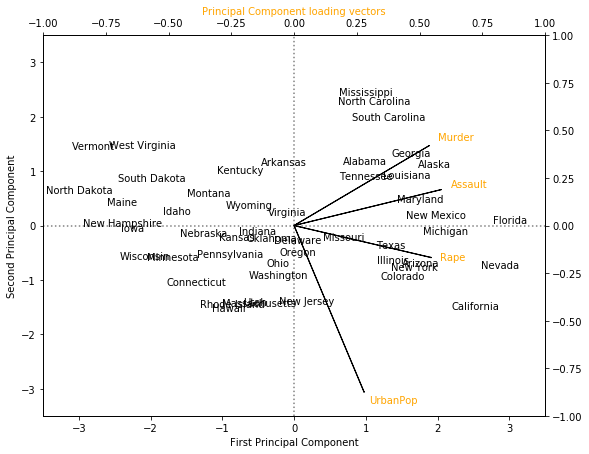

In [40]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# 主成分1, 2をプロットする
# pandas.DataFrame.locで行または列をラベルで指定する（https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html）
# annotateはmatplotlib.text.Textクラスを基底クラスとするAnnotationクラスを返す（https://matplotlib.org/3.1.0/api/text_api.html）
# haはhorizontalalignmentの略（https://matplotlib.org/users/text_props.html）
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], df_plot.PC2.loc[i]), ha='center')

# XY軸をプロット
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# バイプロット
# 新たなaxesインスタンスをつくる（https://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html）
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# aは矢印の先端とテキストの間を制御するオフセットパラメータ
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='orange')

ax2.arrow(0,0,pca_loadings.V1[0], pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], pca_loadings.V2[3]);

In [43]:
# 各主成分によって説明される分散（=Xの共分散行列の大きい方からn_components個の固有値）
pca.explained_variance_

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [44]:
# 寄与率
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

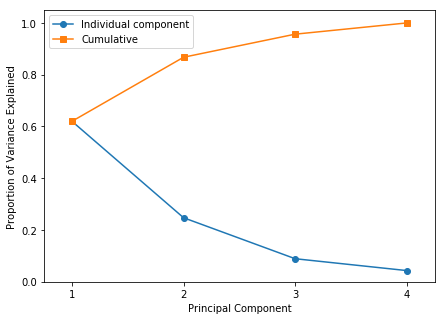

In [45]:
plt.figure(figsize=(7,5))

# 4個の各主成分の寄与率を表す固有値プロット
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
# 累積寄与率のプロット
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

## クラスタリング法 

クラスタリングとはデータセットにおいてサブグループ、またはクラスターを探すための方法全般を指す。データセットの観測値をクラスタリングする際、各グループ内の観測値が互いに類似するように、また異なるグループに属する観測値は極めて異なるような観測値のグループ分割を探す。もちろん、これを具体的に行うには2個あるいはそれ以上の個数の観測値の類似性や非類似性を定義しなければならない。これらは扱うデータに関する知識に基づいた分野特有の判断となる場合が多い。

クラスタリングも主成分分析も、要約によってデータを単純化することを試みる。しかし、それらのメカニズムは異なるものである。

- 主成分分析は、分散を多く説明するように観測値を低次元で表現する。
- クラスタリングは、観測値の中で同類のものを見つけ、グループを作ろうとする。

クラスタリングの1つの応用例は、マーケティングにおいてみられる。我々は多くの人々について多種の観測値を持っているとする（例えば、中間世帯収入、職業、最も近い都市からの距離など）。ここでの目的は、ある広告により強く反応する人々のグループ、ある商品を購入する傾向がより強い人々のグループを特定し、市場をセグメント化することである。市場のセグメント化を行うことは、データセットにおいて人々をクラスタリングすることに相当する。

クラスタリングは多くの領域で使われているため、クラスタリングの方法は非常に多い。ここでは、最も知られている2つのクラスタリングのアプローチに焦点を当てる。それはK平均クラスタリングと階層的クラスタリングである。K平均クラスタリングでは、観測値をあらかじめ定めた数のクラスターに分割する。一方、階層的クラスリングでは、あらかじめいくつのクラスターに分けるかについて定めない。実際、デンドログラムと呼ばれる木のような図で観測値を表現し、クラスター数$1$個から$n$個までのクラスタリングを一度にみることができる。これらのクラスタリングの各アプローチには利点と欠点がある。

一般には、特徴に基づいて観測値をクラスタリングし、観測置換をグループ分けすることもできる。以下においては、議論を簡単にするため。特徴に基づいて観測値をクラスタリングすることについて論じる。特徴のクラスタリングはデータ行列を転置することにより実行することができる。

### K平均クラスタリング

K平均クラスタリングは、データセットを$K$個の互いに素なクラスターに分類するための単純かつ巧妙なアプローチである。K平均クラスタリングを実行するために、まず初めにクラスターの数$K$を指定する。その後K平均法のアルゴリズムが、各観測値を$K$個のクラスターのうちただ1つに割り当てる。

K平均クラスタリングは、単純かつ直観的な数学の問題を解くことによって得られる。まず記号をいくつか定義する。$C_1, \ldots, C_K$を各クラスターにおける観測値のインデックスの集合とする。これらは以下の2つの特性を満たす。
1. $C_1 \cup C_2 \cup \cdots \cup C_K = \{1, \ldots, n\}$。つまり、各観測値は$K$個のクラスターの少なくとも1つに属する。
2. すべての$k \neq k'$に対し、$C_k \cap C_{k'} = \emptyset$。つまり、クラスターは重複しない。どの観測値も2つ以上のクラスターに属することはない。
例えば、$i$番目の観測値が$k$番目のクラスターに属するとき、$i \in C_k$となる。K平均クラスタリングの背景にある考え方は、良いクラスタリングとはクラスター内変動ができるだけ小さくなるようなクラスタリングであるということである。クラスター$C_k$におけるクラスター内変動$W(C_k)$は、クラスター内の観測が互いにどれだけ異なるかを表す量である。したがって、

\begin{equation}
    \mathrm{minimize}_{C_1, \ldots, C_k} \left\{ \sum_{k=1}^{K} W(C_k) \right\} \tag{10.9}
\end{equation}

を解くことになる。これはK個のすべてのクラスターにおいて足しあげられた総クラスター内変動ができる限り小さくなるようにK個のクラスターに観測値を分割する。

最適化問題（10.9）を解くにあたり、クラスター内変動を定義する必要がある。これを定義する方法は多く考えられるが、広く使われているのはユークリッド2乗距離である。これは次で定義される。

\begin{equation}
    W(C_k) := \frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p (x_{ij} - x_{i'j})^2 \tag{10.10} 
\end{equation}

ここで、$|C_k|$は$k$番目のクラスター内の観測値数を表す。言い換えれば、$k$番目のクラスターにおけるクラスター内変動は、$k$番目のクラスター内の観測値間のすべての組み合わせにおけるユークリッド2乗距離の和を$k$番目のクラスターの総観測値数で割ったものである。最適化問題（10.9）と式（10.10）によって、K平均クラスタリングを定義する最適化問題

\begin{equation}
    \mathrm{minimize}_{C_1, \ldots, C_k} \left\{ \sum_{k=1}^{K} \frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p (x_{ij} - x_{i'j})^2 \right\} \tag{10.11}
\end{equation}

ここで、最適化問題（10.11）を解くためのアルゴリズムを見つけたい。すなわち、最適化問題（10.11）の目的関数を最小化するように$K$個のクラスターに観測値を分割する方法である。$n$個の観測値を$K$個のクラスターに分割する方法は約$K^n$通りあるため、実際、これは正確に解くことが非常に困難な問題である。$K$と$n$が非常に小さくない限り、これは莫大な数となる。幸いにも、局所最適解を得られる非常に単純なアルゴリズムがあり、これは、K平均法を行う最適化問題（10.11）に対する非常に良い解となる。このアプローチを次に示す。

#### K平均クラスタリング

Step1: 1から$K$の範囲の乱数を各観測値に割り当てる。これらが観測値の初期クラスターを表す。

Step2: クラスターの割り当てが変動しなくなるまで、以下を繰り返す。
    (a)$K$個の各クラスターにおいて、クラスターの重心を計算する。$k$番目のクラスターの重心は、$k$番目のクラスターの観測値における$p$個の特徴変数の平均ベクトルである。
    (b)各観測値を重心が最も近いクラスターに割り当てる（近さはユークリッド距離を用いて定義する）。

アルゴリズム10.1は各段階において最適化問題（10.11）の目的関数値の単調減少性を保証している。その理由を理解するには、以下の恒等式

\begin{equation}
    \frac{1}{|C_k|}\sum_{i,i' \in C_k}\sum_{j=1}^p (x_{ij} - x_{i'j})^2 = 2 \sum_{i \in C_k}\sum_{j=1}^p (x_{ij} - \bar{x}_{kj})^2
\end{equation}

が有用である。ここで、$\bar{x}_{kj} = \frac{1}{|C_k|}\sum_{i \in C_k}x_{ij}$はクラスター$C_k$における特徴$j$の平均である。Step2(a)では、各特徴におけるクラスターの平均は偏差平方和を最小化する定数となる。Step2(b)では、観測値の再割り当てが式（10.12）を改良する。これは、アルゴリズムが実行されると結果が変化しなくなるまでクラスタリングを改良し続けることを意味する。つまり、最適化問題（10.11）の目的関数は決して増加することはない。結果が変化しなくなったとき、局所最適解が得られる。

K平均クラスタリングのアルゴリズムは、大域的最適解ではなく局所最適解を求めるので、結果はアルゴリズムのStep1における各観測値の（ランダムに与えられる）初期クラスターに依存する。この理由により、異なる初期設定から複数回アルゴリズムを実行することが重要である。そしてそのうちの最適解、つまり最適化問題（10.11）の目的関数が最小となる解を選ぶ。

上記の通り、K平均クラスタリングを実行するには、データをいくつのクラスターに分けるかを決めなければならない。$K$の選択は単純な問題ではない。この問題と、K平均クラスタリングを実行する上でその他に考慮すべきことは後に議論する。

### クラスタリングにおける実用上の問題

クラスタリングは教師なしデータ解析の非常に有用なツールになりうる。しかしながら、クラスタリングを実行する上で多くの問題がある。

#### 大きな重要度をもつ小さな決定

クラスタリングを実行するために、いくつかの事項を決定しなければならない。

- 何かしらの方法によって観測値や特徴は標準化すべきか。例えば、変数は平均を$0$に中心化し、標準偏差を$1$にするようにスケールを調整すべきかもしれない。
- 階層的クラスタリングの場合、
    - 非類似度として何を使うべきか
    - クラスターの連結の方法は何を使うべきか
    - クラスターを得るために、デンドログラムをどこで切断するべきか
- K平均クラスタリングの場合、データ内に何個のクラスターを求めるか

これらの各々の決定すべき事項は、得られる結果に対し、非常に強い影響をもつ。実用上は、いくつかの異なる選択を試し、最も有用な結果、または、解釈が容易な結果をもたらす方法を探すことになる。これらの方法において、唯一の正解はない。データについて何らかの興味深い面が明らかになるならば、いずれの方法も考慮すべきである。

#### 得られたクラスターの検証法

データセットにクラスタリングを実行すれば、いつでもクラスターを見つけることができる。しかし、見つけたクラスターがデータにおける真のグループを表しているのか、あるいは単にノイズをクラスタリングした結果なのかについて知りたくなる。例えば、独立した観測データセットを得たとして、それらの観測値でもまた同じクラスターとなるだろうか。これは、非常に難しい問題である。クラスターが偶然なのか、それとも確かに存在するのかを判断するのに、クラスターに$p$値を割り当てる多くの方法が存在する。しかしながら、唯一の最適なアプローチとして共通認識を得ている方法は存在していない。詳細についてはHastie et. al.(2009)を参照されたい。

#### クラスタリングにおけるその他の考慮すべき点

K平均クラスタリングと階層的クラスタリングはどちらも各観測値をひとつのクラスターに割り当てる。しかしながら、これが適切でないこともある。例えば、実はほとんどの観測値が少数（かつ未知）のグループに属しており、それ以外の少数の観測値は互いに、そしてまた他のすべての観測値ともまったく異なるとする。このとき、K平均クラスタリングや階層的クラスタリングはすべての観測値をクラスターに割り当てるため、どのクラスターにも属さない外れ値の存在のために、クラスターの結果を大きく歪ませる。混合モデルは、そのような外れ値の存在に対応するための魅力的なアプローチである。これらはK平均クラスタリングに柔軟性をもたせたものであり。その方法はHastie. et. al.(2009)に示されている。

さらに、クラスタリングの方法は、一般的にはデータの変動に対し、あまりロバストでない。例えば、$n$個の観測値をクラスタリングし、ランダムに$n$個の観測値の一部を除いた後に、再度観測値をクラスタリングすることを考える。得られた2つのクラスタリングの結果がほぼ同様になることが望まれるが、2つの結果はしばしば異なる。

#### クラスタリングの結果を解釈するための柔軟なアプローチ

これまでクラスタリングに関連した問題をいくつか挙げてきた。しかしながら、適切に用いられれば、クラスタリングはとても有用で妥当な統計的ツールである。データをどのように標準化するか、どのような連結法を用いるかのように、クラスタリングを実行する際の小さな決断が結果に大きな効果を与えることについて言及した。したがって、これらのパラメータについて異なる値でクラスタリングを行い、すべての結果を観察してどのパターンが一貫して現れるかを確認することを勧める。クラスタリングはロバストでないこともあるので、得られたクラスターのロバスト性を知るために、データの一部をクラスタリングすることを勧める。最も重要なことは、どのようにクラスター分析の結果を報告するかについて注意を払わなければならないということである。これらの結果は、データセットに関する絶対的な真実だと捉えるべきではない。むしろ、クラスター分析は、独立したデータセットにおける科学的な仮説やさらなる研究の出発点となるべきである。

## 実習2: クラスタリング

### 10.5.1 K平均クラスタリング

In [6]:
# データ生成
np.random.seed(1)
# n=50, p=2
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [9]:
# K=2
# n_initはkmeansアルゴリズムのステップ数（https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html）
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
# 50個の観測値のクラスターの割り当て
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [17]:
# K=3
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
pd.Series(km2.labels_).value_counts()

1    23
2    17
0    10
dtype: int64

In [19]:
# inertia: Sum of squared distances of samples to their closest cluster center
km2.inertia_

52.269903934169854

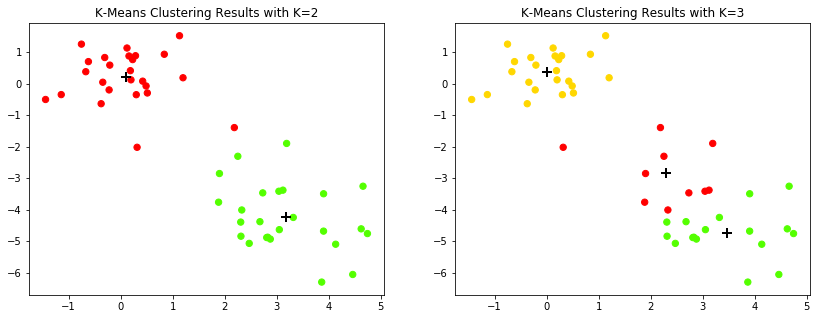

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism)
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

## Reference

- 落海浩，首藤信通．Rによる統計的学習入門．朝倉書店，2018，403p．
- https://github.com/JWarmenhoven/ISLR-python